In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def eigen_function(t,i):
    if not type(i) == np.ndarray:
        return np.sin(np.pi*i*t)
    else:
        return np.sin(np.pi*np.outer(i,t))

def eigen_value(i):
    return 1/(np.pi*i)**2



def KL_dt(t,d, distr = 'normal'):
    """Not certain whether any of this is correct"""

    dims = np.arange(1,d+1,1, dtype=int) # dimensions
    eig_vals = np.expand_dims(eigen_value(dims),1) # expand array for later broadcasting
    eig_funs = eigen_function(t,dims) # comes as 2D array

    # draw random matrix
    if distr == 'normal':
        Yhat = np.random.normal(0,1,size = eig_funs.shape)
    elif distr == 'uniform':
        Yhat = np.random.uniform(-1,1,size = eig_funs.shape)
    else:
        raise AttributeError("Only 'normal' or 'uniform' distribution are allowed")
    
    Zi = np.sqrt(eig_vals) * Yhat # random part
    Ydt = np.sum(np.multiply(Zi, eig_funs),axis=0) # mulitply random with temporal part and sum over dimensions

    return Ydt

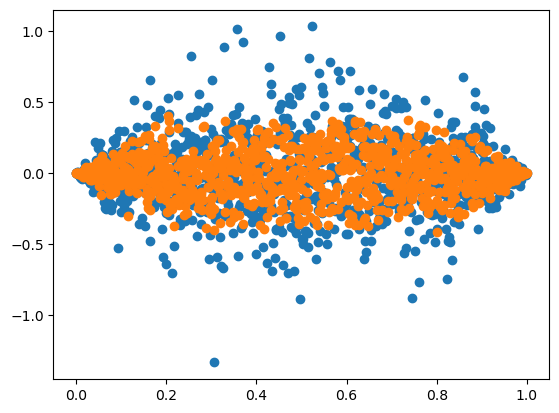

In [106]:
x = np.linspace(0,1,1000)
d = 4
plt.scatter(x,KL_dt(x,d, distr='normal'))
plt.scatter(x,KL_dt(x,d, distr='uniform'))